In [1]:
!git clone https://github.com/karpathy/nanoGPT.git

Cloning into 'nanoGPT'...
remote: Enumerating objects: 649, done.
remote: Total 649 (delta 0), reused 0 (delta 0), pack-reused 649
Receiving objects: 100% (649/649), 936.46 KiB | 28.38 MiB/s, done.
Resolving deltas: 100% (371/371), done.


In [2]:
!pip install torch numpy cohere openai transformers datasets tiktoken wandb tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.9/221.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [7]:
!python /content/nanoGPT/data/lyrics/prepare.py

train has 22,308,928 tokens
val has 2,456,916 tokens


In [24]:
!python /content/nanoGPT/train.py /content/nanoGPT/config/train_lyrics.py --device=cuda --compile=False --eval_iters=10 --log_interval=1 --block_size=64 --batch_size=12 --n_layer=4 --n_head=4 --n_embd=128 --max_iters=1000 --lr_decay_iters=2000 --dropout=0.0

Overriding config with /content/nanoGPT/config/train_lyrics.py:
# train a miniature nanoGPT model
# good for debugging and playing on macbooks and such

out_dir = 'out-lyrics'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'lyrics'
wandb_run_name = 'mini-gpt'

dataset = 'lyrics'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of tokens per iter is small

eval_interval = 1

In [27]:
!python /content/nanoGPT/sample.py --out_dir=out-lyrics --device=cpu

Overriding: out_dir = out-lyrics
Overriding: device = cpu
NAAZ RESUME---------------
number of parameters: 7.23M
meta_path data/lyrics/meta.pkl
No meta.pkl found, assuming GPT-2 encodings...

A good, what a time  
When it like so only love  
But you couldn't believe you were you on  
They're just the breath  
And I'm the love the morning as all,  
Of all how you  
  
I don't love my soul, I can't be  
Oh, it'll do  
I'm gonna hear (I'm on  
And you can't baby  
I feel will never say I could you  
I'm no good  
That know I could do  
I don't want to tell you  
  
  
I'm gonna have to know there  
I got you before  
It's waiting,  
I'm gonna be and I can't want to me  
But the love you never've been been  
I don't you know where you ain't  
The other day  
I've like you  
I'm gonna be in your love  
And if you got for you  
If you so that I will leave you want to know  
I've just better  
  
I've been you  
I'm where I'm one  
'  
You're so I've been another  
I was been in  
  
I'm so l

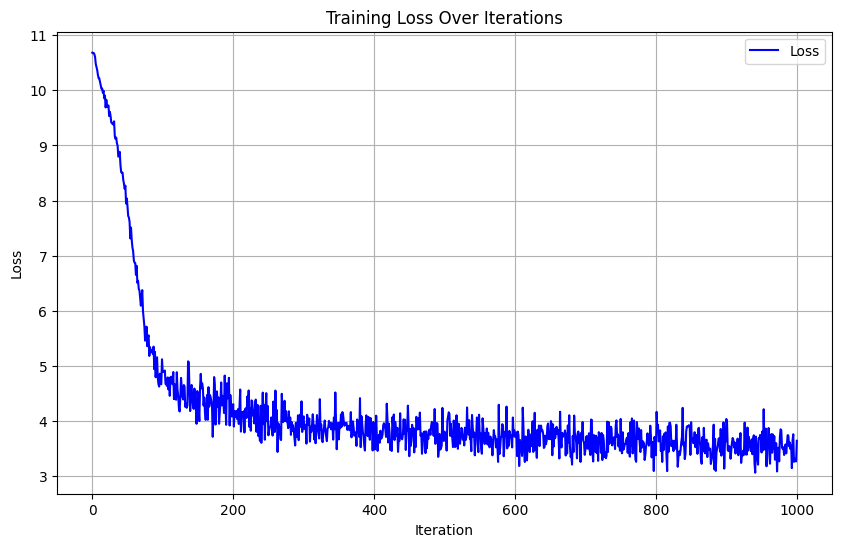

In [25]:
import matplotlib.pyplot as plt

# File path for the losses
losses_file_path = 'out-lyrics/trainlosses.txt'  # Replace with the actual path

# Read data from the losses file
with open(losses_file_path, 'r') as f:
    lines = f.readlines()

# Extract iteration numbers and losses
iterations = []
losses = []

for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:  # Ensure the line has exactly two elements
        iterations.append(int(parts[0]))
        losses.append(float(parts[1]))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, losses, label='Loss', color='blue')
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('out-lyrics/nanoGPT:spotifyDataset training.png')
plt.show()

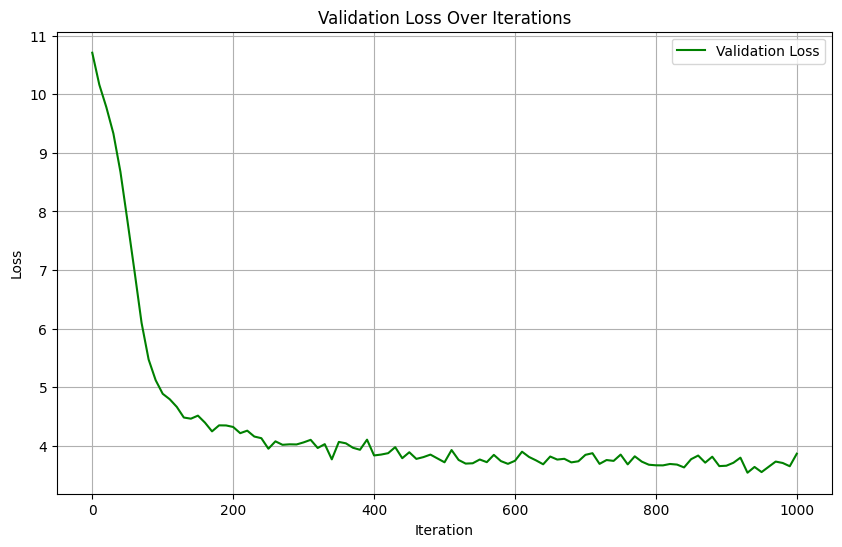

In [26]:
import matplotlib.pyplot as plt

losses_file_path = 'out-lyrics/vallosses.txt'

# Read data from the losses file
with open(losses_file_path, 'r') as f:
    lines = f.readlines()

# Extract iteration numbers and losses
iterations = []
losses = []

for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        iterations.append(int(parts[0]))
        losses.append(float(parts[1]))

plt.figure(figsize=(10, 6))
plt.plot(iterations, losses, label='Validation Loss', color='green')
plt.title('Validation Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('out-lyrics/nanoGPT:spotifyDataset validation.png')
plt.show()